In [1]:
# pip install pandas statsmodels
import statsmodels.api as sm
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# Criar um DataFrame com dados fictícios
data = {'Vendas_Sorvetes': [200, 300, 400, 350, 500],'Temperatura': [28, 30, 32, 29, 33],'Promocao_Marketing': [1000, 1200, 800, 900, 1100]}
dados = pd.DataFrame(data)

In [3]:
dados.head()

,Vendas_Sorvetes,Temperatura,Promocao_Marketing
0,200,28,1000
1,300,30,1200
2,400,32,800
3,350,29,900
4,500,33,1100


Text(0.5, 1.0, 'Relação entre Temperatura e Vendas de Sorvetes')

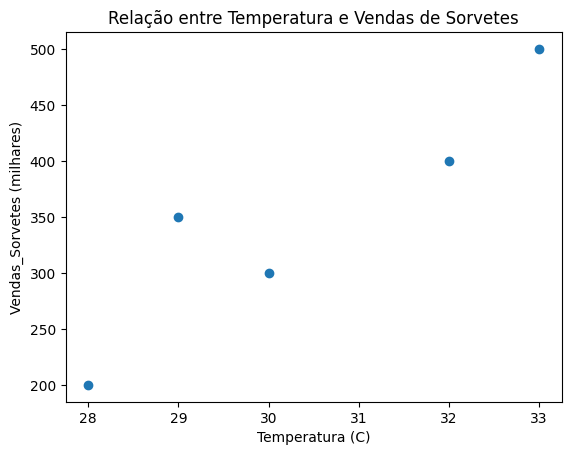

In [4]:
plt.scatter(dados['Temperatura'], dados['Vendas_Sorvetes'])
plt.xlabel("Temperatura (C)")
plt.ylabel("Vendas_Sorvetes (milhares)")
plt.title("Relação entre Temperatura e Vendas de Sorvetes")

In [5]:
dados.corr()

,Vendas_Sorvetes,Temperatura,Promocao_Marketing
Vendas_Sorvetes,1.000000,0.916579,-0.070711
Temperatura,0.916579,1.000000,0.000000
Promocao_Marketing,-0.070711,0.000000,1.000000


In [6]:
X = dados[['Temperatura']]
y = dados['Vendas_Sorvetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)
previsoes = modelo.predict(X_test)

In [8]:
# Adicionar uma constante para o termo de intercepto
dados['Intercepto'] = 1

# Definir as variáveis independentes (X)
X = dados[['Intercepto', 'Temperatura', 'Promocao_Marketing']]

# Definir a variável dependente (Y)
Y = dados['Vendas_Sorvetes']

# Criar e ajustar o modelo de regressão linear múltipla
modelo = sm.OLS(Y, X).fit()

# Imprimir os resultados do modelo
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:        Vendas_Sorvetes   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     5.456
Date:                Sat, 31 Aug 2024   Prob (F-statistic):              0.155
Time:                        15:07:11   Log-Likelihood:                -25.458
No. Observations:                   5   AIC:                             56.92
Df Residuals:                       2   BIC:                             55.74
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercepto         -1102.3256    497

c:\Users\kake\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
